# (04) rebuttal results: poisson sample hist

**Motivation**: Sample from Poisson for different temperatures and lambdas. Host: ```chewie```. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
# sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
# sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
sys.path.insert(0, '/home/hadi/Dropbox/chkpts/pvae-source-code')
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 1
device = f'cuda:{device_idx}'

In [3]:
fig_dir = pjoin(fig_base_dir, 'rebuttal_aug')
os.makedirs(fig_dir, exist_ok=True)
print(os.listdir(fig_dir))

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 600,
}

['temp.pdf', 'anneal_lin.pdf', 'samples_hist.pdf', 'logreg.pdf', 'dim.pdf', 'anneal_exp.pdf', 'anneal.pdf']

## Generate samples

In [4]:
from base.distributions import Poisson

In [5]:
lamb = torch.tensor([0.5, 1, 2, 8])
temperatures = [
    0.0, 0.01, 0.05, 0.1, 0.2, 0.3,
    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
]
kws = dict(
    log_rate=torch.log(lamb),
    clamp=None,
    n_exp=1000,
)
dists = {
    t: Poisson(temp=t, **kws)
    for t in temperatures
}

In [6]:
n_samples = int(1e5)
samples = collections.defaultdict(list)
for _ in tqdm(range(n_samples)):
    for t, dist in dists.items():
        samples[t].append(dist.rsample())
samples = {
    t: tonp(torch.stack(s).T)
    for t, s in samples.items()
}

100%|█████████████████████████████████| 100000/100000 [01:18<00:00, 1278.15it/s]


In [7]:
df = []
for t, samp in samples.items():
    for i, s in enumerate(samp):
        df.append({
            'Temperature': [t] * len(s),
            'lamb': [tonp(lamb)[i]] * len(s),
            'index': np.arange(len(s)),
            'sample': s,
        })
df = pd.DataFrame(merge_dicts(df))
len(df) / n_samples / len(lamb) / len(temperatures)

1.0

In [8]:
df

,Temperature,lamb,index,sample
0,0.0,0.5,0,1.000000
1,0.0,0.5,1,0.000000
2,0.0,0.5,2,1.000000
3,0.0,0.5,3,0.000000
4,0.0,0.5,4,0.000000
...,...,...,...,...
5199995,1.0,8.0,99995,13.908824
5199996,1.0,8.0,99996,12.642017
5199997,1.0,8.0,99997,9.736068
5199998,1.0,8.0,99998,11.641313


## Make fig

In [9]:
upper = 5
n_bins = 50
width = upper / n_bins
bins = np.linspace(0, upper + width, n_bins + 2)
bins -= width / 2

In [23]:
muted

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [10]:
muted = sns.color_palette('muted')

pal_temp = {
    0.0: 'k', 
    0.01: muted[3],
    0.1: muted[2],
    1.0: muted[7],
}

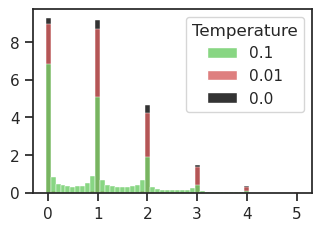

In [11]:
fig, ax = create_figure(1, 1, (3.1, 2.2))

d2p = df.loc[
    (df['lamb'] == 1.0) &
    (df['Temperature'].isin(pal_temp))
]

sns.histplot(
    d2p,
    x='sample',
    hue='Temperature',
    bins=bins,
    palette=pal_temp,
    alpha=0.8,
    stat='percent',
    hue_order=[0.1, 0.01, 0.0],
    ax=ax,
)
ax.set(xlabel='', ylabel='')

fig.savefig(pjoin(fig_dir, 'samples_hist.pdf'), **kws_fig)
plt.show()

## Final fig

In [29]:
upper = 5
n_bins = 50
width = upper / n_bins
bins = np.linspace(0 - width, upper + width, n_bins + 3)
bins -= width / 2

In [30]:
pal_temp = {
    0.0: 'k', 
    0.01: muted[2],
    0.1: muted[3],
    1.0: muted[0],
}

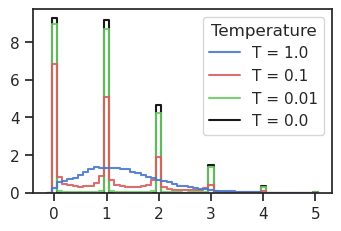

In [31]:
fig, ax = create_figure(1, 1, (3.3, 2.2))

d2p = df.loc[
    (df['lamb'] == 1.0) &
    (df['Temperature'].isin(pal_temp))
]

sns.histplot(
    d2p,
    x='sample',
    hue='Temperature',
    bins=bins,
    palette=pal_temp,
    alpha=0.9,
    stat='percent',
    element='step',
    fill=False,
    hue_order=[1.0, 0.1, 0.01, 0.0],
    ax=ax,
)
ax.set(xlabel='', ylabel='')

legend = ax.get_legend()
for text in legend.get_texts():
    text.set_text(f"T = {text.get_text()}")

fig.savefig(pjoin(fig_dir, 'samples_hist.pdf'), **kws_fig)
plt.show()

In [82]:
muted = sns.color_palette('muted')

In [83]:
muted

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

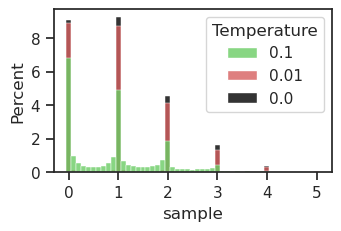

In [86]:
muted = sns.color_palette('muted')

pal_temp = {
    0.0: 'k', 
    0.01: muted[3],
    0.05: muted[4],
    0.1: muted[2],
}

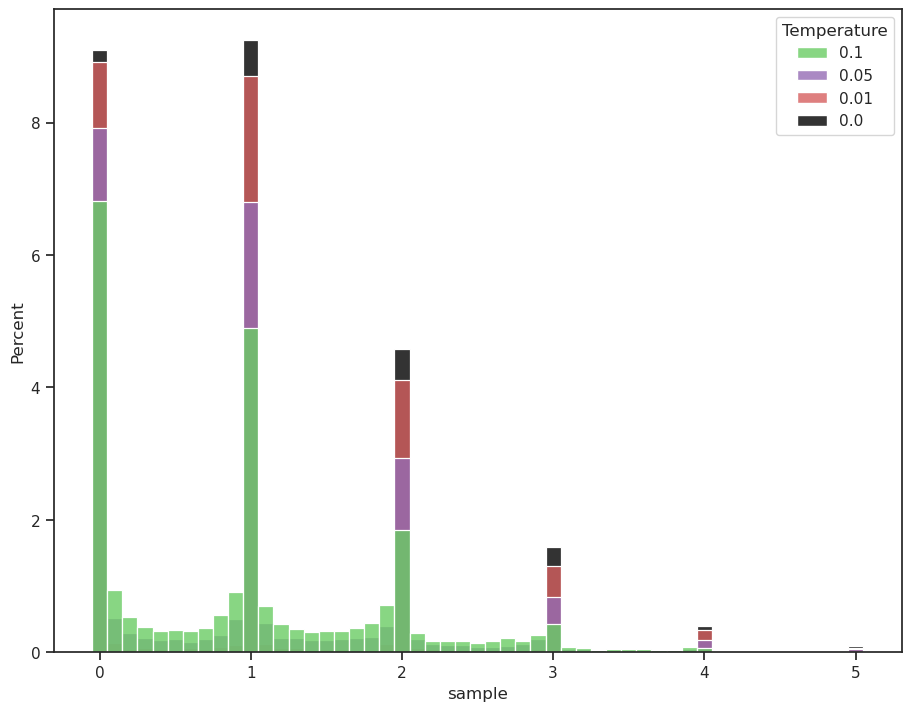

In [88]:
fig, ax = create_figure(1, 1, (9, 7))

d2p = df.loc[
    (df['lamb'] == 1.0) &
    (df['Temperature'].isin(pal_temp))
]

sns.histplot(
    d2p,
    x='sample',
    hue='Temperature',
    bins=bins,
    palette=pal_temp,
    alpha=0.8,
    stat='percent',
    hue_order=[0.1, 0.05, 0.01, 0.0],
    ax=ax,
)
plt.show()

## Thinner bins

In [78]:
upper = 5
n_bins = 100
width = upper / n_bins
bins = np.linspace(0, upper + width, n_bins + 2)
bins -= width / 2

In [79]:
muted = sns.color_palette('muted')

pal_temp = {
    0.0: 'k', 
    0.01: muted[3],
    0.1: muted[2],
    1.0: muted[7],
}

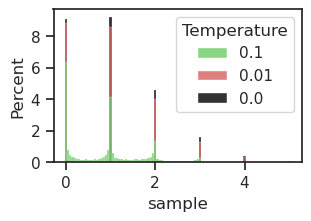

In [80]:
fig, ax = create_figure(1, 1, (3.0, 2.1))

d2p = df.loc[
    (df['lamb'] == 1.0) &
    (df['Temperature'].isin(pal_temp))
]

sns.histplot(
    d2p,
    x='sample',
    hue='Temperature',
    bins=bins,
    palette=pal_temp,
    alpha=0.8,
    stat='percent',
    hue_order=[0.1, 0.01, 0.0],
    ax=ax,
)
plt.show()

In [73]:
muted = sns.color_palette('muted')

pal_temp = {
    0.0: 'k', 
    0.01: muted[3],
    0.05: muted[4],
    0.1: muted[2],
}

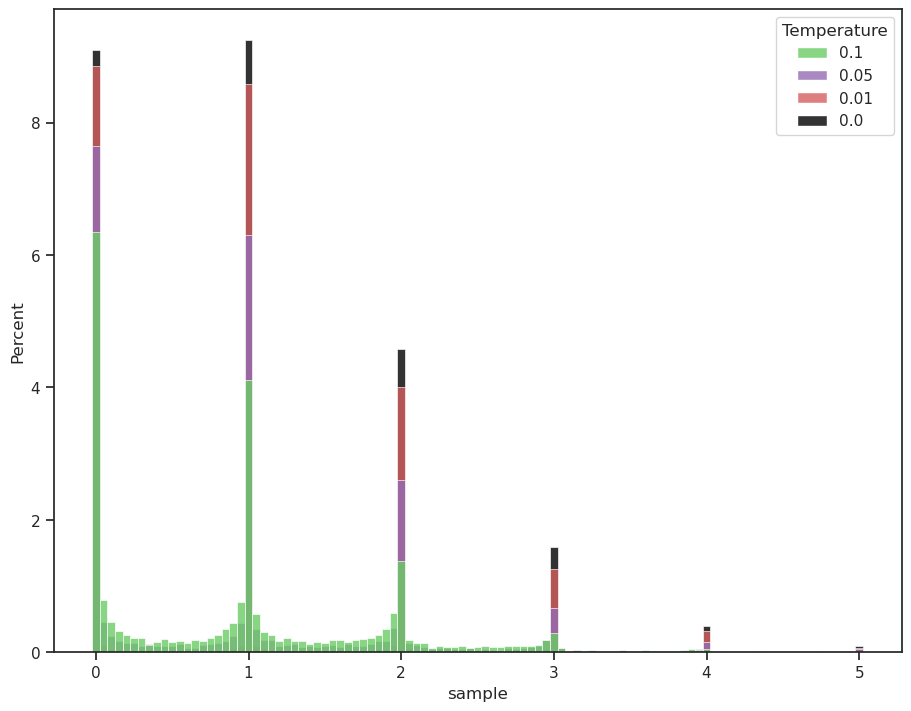

In [76]:
fig, ax = create_figure(1, 1, (9, 7))

d2p = df.loc[
    (df['lamb'] == 1.0) &
    (df['Temperature'].isin(pal_temp))
]

sns.histplot(
    d2p,
    x='sample',
    hue='Temperature',
    bins=bins,
    palette=pal_temp,
    alpha=0.8,
    stat='percent',
    hue_order=[0.1, 0.05, 0.01, 0.0],
    ax=ax,
)
plt.show()